In [14]:
# ----- LIBS

import os 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

import folium
from folium import plugins
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Roteiro

- Posicionamento e SF
- Métricas da camada PHY
- Cobertura/Alcance Lora
- Métricas de performance da rede completa (Mac Layer)
- Métricas de Consumo

# Posicionamento x SF

In [33]:
current_path = os.getcwd()
current_path

'/home/wasp/Desktop/Mestrado/ns3-bmap/NS3/obstacle_exp'

In [34]:
# ----- DATASET

path = "network_position_coletores_unicamp.txt"
net_position_df = pd.read_csv(path, header=None) 
net_position_df.columns = ["nodeId", "posX", "posY", "posZ",
                           "sf", "gwId", "gw_posX", "gw_posY", "gw_posZ", "distance"]

# print(path)
print("\nSHAPE:", net_position_df.shape)
net_pos = net_position_df.iloc[0:47]

print("\nSHAPE:", net_pos.shape)
net_pos.head()


SHAPE: (6768000, 10)

SHAPE: (47, 10)


,nodeId,posX,posY,posZ,sf,gwId,gw_posX,gw_posY,gw_posZ,distance
0,0,1527.410,2180.210,1,7,47,1694.97,2141.47,44.9188,177.509
1,1,297.312,1965.810,1,7,47,1694.97,2141.47,44.9188,1409.340
2,2,1535.550,1646.180,1,7,47,1694.97,2141.47,44.9188,522.165
3,3,1149.490,1831.090,1,7,47,1694.97,2141.47,44.9188,629.144
4,4,1186.800,667.866,1,7,47,1694.97,2141.47,44.9188,1559.390


In [35]:
# ----- PLOT SIZE SETTINGS

# chart bounds
xMin_bound, xMax_bound = -500, 2000
yMin_bound, yMax_bound = 0, 2500 

# chart figsize
x_figsize, y_figsize = 5, 5


In [28]:
# ----- LEGEND SETTINGS PER PLOT
def set_plots_legends():
   
    # legend list settings
    plots_legends = []
       
    # ED points
    colors = ['y','orange', 'green', 'blue', 'purple', 'black']
    for sf in range(len(colors)):
        scatter_lgd = mlines.Line2D([], [], color = 'white', marker = 'o',  markeredgecolor = colors[sf],
                                  markeredgewidth = 0.5, markerfacecolor = colors[sf], markersize = 7, 
                                  label = 'SF' + str(sf + 7))
        plots_legends.append(scatter_lgd)
    
    
    # GW points
    scatter_lgd = mlines.Line2D([], [], color = 'white', marker = (5,2), markeredgecolor = 'red',
                                  markeredgewidth = 0.5, markerfacecolor = 'red', markersize = 15, 
                                  label = 'GW')
    plots_legends.append(scatter_lgd)
    
    return plots_legends

In [29]:
# ----- EDs LISTS per SF

eds_x_sf7 = []
eds_y_sf7 = []
eds_x_sf8 = []
eds_y_sf8 = []
eds_x_sf9 = []
eds_y_sf9 = []
eds_x_sf10 = []
eds_y_sf10 = []
eds_x_sf11 = []
eds_y_sf11 = []
eds_x_sf12 = []
eds_y_sf12 = []

for i in range (len(net_pos)):
    if net_pos.iloc[i].sf == 7.0:
        eds_x_sf7.append(net_pos.iloc[i].posX)
        eds_y_sf7.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 8.0:
        eds_x_sf8.append(net_pos.iloc[i].posX)
        eds_y_sf8.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 9.0:
        eds_x_sf9.append(net_pos.iloc[i].posX)
        eds_y_sf9.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 10.0:
        eds_x_sf10.append(net_pos.iloc[i].posX)
        eds_y_sf10.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 11.0:
        eds_x_sf11.append(net_pos.iloc[i].posX)
        eds_y_sf11.append(net_pos.iloc[i].posY)
    if net_pos.iloc[i].sf == 12.0:
        eds_x_sf12.append(net_pos.iloc[i].posX)
        eds_y_sf12.append(net_pos.iloc[i].posY)

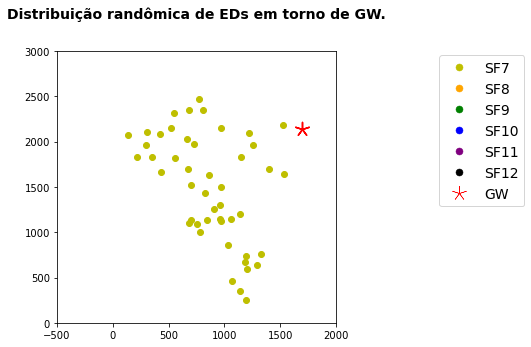

In [30]:
# ----- PLOT ED E GW

# plot initialize
fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))

# draw ED posxy per SF 
ax.scatter(eds_x_sf7, eds_y_sf7, color='y', label ='SF7')
ax.scatter(eds_x_sf8, eds_y_sf8, color='orange', label ='SF8')
ax.scatter(eds_x_sf9, eds_y_sf9, color='green', label ='SF9')
ax.scatter(eds_x_sf10, eds_y_sf10, color='blue', label ='SF10')
ax.scatter(eds_x_sf11, eds_y_sf11, color='purple', label ='SF11')
ax.scatter(eds_x_sf12, eds_y_sf12, color='black', label ='SF10')

# draw GW
ax.scatter(net_pos.iloc[0].gw_posX, net_pos.iloc[0].gw_posY, color='red', label ='GW', marker = (5,2), s = 200)
        
# legend settings
legends_list = set_plots_legends()
ax.legend(handles=[line for line in legends_list], loc="upper right", bbox_to_anchor=(1.7, 1.01), prop={'size': 14})

# chart bounds
ax.set(xlim=(xMin_bound, xMax_bound), ylim = (yMin_bound, yMax_bound))

# Title
ax.set_title('Distribuição randômica de EDs em torno de GW.', fontweight='bold', fontsize=14, y=1.1)
plt.show()
# fig.savefig('dist_rand_ed_gw.png',bbox_inches='tight')

# Métricas da camada PHY

In [41]:
# ----- DATASET

path = "phy_results_coletores_unicamp.txt"
phy_df = pd.read_csv(path, header=None) 
phy_df.columns = ["gwID", "received", "interfered", "noMoreReceivers", "underSensitivity", "lost"]

print("\nSHAPE:", phy_df.shape)
phy_df.head()


SHAPE: (5, 6)


,gwID,received,interfered,noMoreReceivers,underSensitivity,lost
0,0,94,0,0,0,0
1,0,94,0,0,0,0
2,0,94,0,0,0,0
3,0,94,0,0,0,0
4,0,94,0,0,0,0


In [42]:
# Valores médios de cada coluna
print("PHY LAYER - Packet Outcome METRICS:\n")
print("received:", phy_df['received'].mean())
print("interfered:", phy_df['interfered'].mean())
print("noMoreReceivers:", phy_df['noMoreReceivers'].mean())
print("underSensitivity:", phy_df['underSensitivity'].mean())
print("lost:", phy_df['lost'].mean())

PHY LAYER - Packet Outcome METRICS:

received: 94.0
interfered: 0.0
noMoreReceivers: 0.0
underSensitivity: 0.0
lost: 0.0


# Cobertura/Alcance LoRa

In [21]:
# ----- DATASET

path = "rssi_results_coletores_unicamp.txt"
rssi_df = pd.read_csv(path, header=None) 
rssi_df.columns = ["gwId", "nodeId", "RSSI_Sim", "distance_between"]

# print(path)
print("\nSHAPE:", rssi_df.shape)
rssi_df = rssi_df.iloc[0:47]
print("\nSHAPE:", rssi_df.shape)
rssi_df.head()


SHAPE: (235, 4)

SHAPE: (47, 4)


,gwId,nodeId,RSSI_Sim,distance_between
0,47,0,-69.8765,177.509
1,47,1,-100.5380,1409.340
2,47,2,-85.8443,522.165
3,47,3,-88.6026,629.144
4,47,4,-102.0360,1559.390


In [22]:
# Visualizando dataset criado
coletores_df = pd.read_csv("coletores_pos_dataset_elev.csv") 
print("DATASET SHAPE:", coletores_df.shape)
coletores_df.head()

DATASET SHAPE: (47, 9)


,Unnamed: 0,id,name,x,y,z,elevation,latitude,longitude
0,0,1321.0,INOVA,1527.405075,2180.212233,1.5,644.458740,-22.814543,-47.059340
1,1,535.0,BC,297.311734,1965.812273,1.5,602.154968,-22.816324,-47.071348
2,2,802.0,CBMEG,1535.553550,1646.180816,1.5,652.513123,-22.819365,-47.059333
3,3,845.0,CCUEC,1149.489906,1831.086023,1.5,616.788940,-22.817648,-47.063068
4,4,1037.0,GASTROCENTRO,1186.795533,667.866479,1.5,635.025085,-22.828153,-47.062863


In [35]:
rssi_df['latitude'] = coletores_df['latitude']
rssi_df['longitude'] = coletores_df['longitude']
print("DATASET SHAPE:", rssi_df.shape)
rssi_df.head(5)

DATASET SHAPE: (47, 6)


,gwId,nodeId,RSSI_Sim,distance_between,latitude,longitude
0,47,0,-69.8765,177.509,-22.814543,-47.059340
1,47,1,-100.5380,1409.340,-22.816324,-47.071348
2,47,2,-85.8443,522.165,-22.819365,-47.059333
3,47,3,-88.6026,629.144,-22.817648,-47.063068
4,47,4,-102.0360,1559.390,-22.828153,-47.062863


In [24]:
rssi_df['latitude'].iloc[0:1].values[0]

-22.81454328691809

In [25]:
heat_data = []
for i in range(rssi_df.shape[0]):
    heat_data.append([
        rssi_df['latitude'].iloc[i:i+1].values[0],
        rssi_df['longitude'].iloc[i:i+1].values[0],
        rssi_df['RSSI_Sim'].iloc[i:i+1].values[0]
    ])

# print(heat_data)

In [26]:
# LEGENDA
import branca

legend_html = '''
{% macro html(this, kwargs) %}
<div style="
    position: fixed; 
    bottom: 80px;
    left: 20px;
    width: 150px;
    height: 80px;
    top: 425px;
    z-index:9999;
    font-size:13px;
    ">
    <p><a style="margin-left:10px;"><b>RSSI (Dbm)</a></b></p>
    <p><a style="color:#2652ca;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[0, -80]</b></p>
    <p><a style="color:#338dff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-81, -100]</b></p>
    <p><a style="color:#33c1ff;font-size:150%;margin-left:20px;">&diams;</a>&emsp;<b>[-101, -150]</b></p>
</div>
<div style="
    position: fixed; 
    bottom: 30px;
    left: 20px;
    width: 150px;
    height: 140px; 
    z-index:9998;
    font-size:14px;
    background-color: #ffffff;
    border:2px solid grey;
    opacity: 0.9;
    ">
</div>
{% endmacro %}
'''
legend = branca.element.MacroElement()
legend._template = branca.element.Template(legend_html)

In [31]:
# ---- UNICAMP DYNAMIC PLOT MAP & MARKERS OF POSITIONS THAT PACKET WERE RECEIVE

# create folium map
fmap = folium.Map(width= 500,height=600,location=[-22.822617, -47.067], zoom_start=15, tiles='OpenStreetMap')

# add markers
for data in heat_data:
  lat, lng, rssi = data[0], data[1], data[2]
#   print(lat, lng)
#   print('RSSI', rssi)
  if rssi >= -80:
        color_rssi = 'darkblue'
  elif rssi < -80 and rssi >= -100:
        color_rssi = 'blue'
  elif rssi < -100:
        color_rssi = "lightblue"

  folium.Marker(
      location=[float(lat), float(lng)],
      popup="Lat: " + str(lat) + ", Lng: " + str(lng)+ ", Rssi: " + str(rssi),
      icon=folium.Icon(color=color_rssi),
  ).add_to(fmap)

fmap.get_root().add_child(legend)

fmap

In [33]:
# salve map
fn="okumura_elev.html"
fmap.save(fn)

# Métricas de performance da rede completa (Mac Layer)

In [36]:
# ----- DATASET

path = "net_results_coletores_unicamp.txt"
net_df = pd.read_csv(path, header=None) 
net_df.columns = ["nSent", "nReceiv", "PER", "PLR", "PDR"]

print("\nSHAPE:", net_df.shape)
net_df.head()


SHAPE: (5, 5)


,nSent,nReceiv,PER,PLR,PDR
0,94,94,0,0,1
1,94,94,0,0,1
2,94,94,0,0,1
3,94,94,0,0,1
4,94,94,0,0,1


In [40]:
# Valores médios de cada coluna
print("NETWORK PERFORMANCE METRICS:\n")
print("nSent:", net_df['nSent'].mean())
print("nReceiv:", net_df['nReceiv'].mean())
print("\nPER:", net_df['PER'].mean())
print("PLR:", net_df['PLR'].mean())
print("PDR:", net_df['PDR'].mean())

NETWORK PERFORMANCE METRICS:

nSent: 94.0
nReceiv: 94.0

PER: 0.0
PLR: 0.0
PDR: 1.0


# Métricas de Consumo